# SVM & Hyperparametertuning

Support Vector Machines behoren nog altijd tot een van de meest populaire en gebruikte ML algoritmes. Ze zijn bijzonder veelzijdig en kunnen ingezet worden bij zowel classificatieproblemen als regressieproblemen en zelfs bij het opsporen van uitschieters.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from skopt import BayesSearchCV

from scipy.stats import randint 
from scipy.stats import uniform
from skimage.io import imread, imshow

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

/home/florian/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Kankerdetectie

Train een model om te voorspellen of een bepaalde tumor goedaardig (benign) of kwaadaardig (malignant) is. Gebruik daarvoor de dataset 'cancer.csv'

Baseer je op de methodieken uit voorgaande opdrachten om tot een zo goed mogelijk resultaat te komen. Bespreek telkens de gemaakte keuzes en resultaten en kom tot een duidelijk besluit.

Tip: een classifier kan enkel maar getraind worden met numerieke waarden. Vervang daarom bij de feature diagnose de twee klasses die voorkomen door 0 en 1, waarbij 0 staat voor goedaardig en 1 voor kwaadaardig.




In [2]:
# Inlezen van de dataset

dataset = pd.read_csv('cancer.csv')
dataset.head(100)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902
1,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
2,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
3,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678
4,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.217,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
5,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
6,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.856,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
7,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720
8,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750
9,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.466,40.510,0.004029,0.009269,0.011010,0.007591,0.014600,0.003042,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.145900,0.09975,0.2948,0.08452


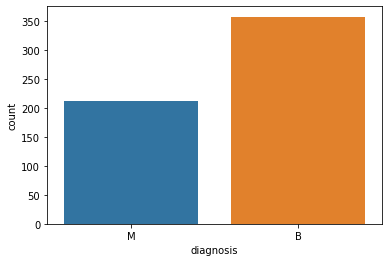

In [3]:
# Onderzoek in welke mate de dataset gebalanceerd is.
sns.countplot(data=dataset, x='diagnosis')

De data is niet gebalanceerd, er zijn veel meer gevallen waarbij de tumor goedaardig bleek.

In [4]:
# Verwijder de kolom id omdat je er mag vanuit gaan dat de naam van de persoon geen invloed heeft op het type kanker
dataset.drop(['id'], axis=1, inplace=True)
# Vervangen van B en M door 0 en 1 in de output diagnosis
dataset = dataset.replace(['B', 'M'], [0, 1])

In [5]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.371479,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,0.483626,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015063,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,0.000000,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,1.000000,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032217,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                568 non-null    int64  
 1   radius_mean              568 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimeter_mean           568 non-null    float64
 4   area_mean                568 non-null    float64
 5   smoothness_mean          568 non-null    float64
 6   compactness_mean         568 non-null    float64
 7   concavity_mean           568 non-null    float64
 8   concave points_mean      568 non-null    float64
 9   symmetry_mean            568 non-null    float64
 10  fractal_dimension_mean   568 non-null    float64
 11  radius_se                568 non-null    float64
 12  texture_se               568 non-null    float64
 13  perimeter_se             568 non-null    float64
 14  area_se                  5

In [137]:
# Opsplitsen in features en targets
features = dataset.drop(['diagnosis'], axis=1)
targets = dataset['diagnosis']

# Normalisatie van de features
# features = preprocessing.normalize(features)

# Opsplitsen in training set en test set. Zorg ervoor dat er 150 samples in de test set zitten.
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=150, random_state=12)

# Om conversion warning te vermijden:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train een logistic regression model via cross-validation.

Gebruik daarvoor zowel grid search, random search en Bayes optimization om op zoek te gaan naar de beste hyperparameters: C-waarde, class_weight, solver. Meer info: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. 

De Bayes optimzation uit de scikit-optimize (skopt) lijkt niet altijd meer te werken. Daarom kan je best gebruik maken van de optimzer te vinden op https://github.com/fmfn/BayesianOptimization.
Installatie hiervan kan via volgend commando in de command line:

`pip3 install git+https://github.com/darenr/scikit-optimize`
    
Varieer bij K-fold cross-validation de waarde van K. Bespreek de resultaten.
Test de bekomen modellen op de test set. Welke search techniek geniet jouw voorkeur en waarom?
Heeft het zin om de featureset uit te breiden met polynomial features? Test dit. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html



Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.6s finished


Best accuracy :  0.9689041881812965
Best parameters : {'C': 0.1, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        56

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

[[93  1]
 [ 2 54]]
98.0


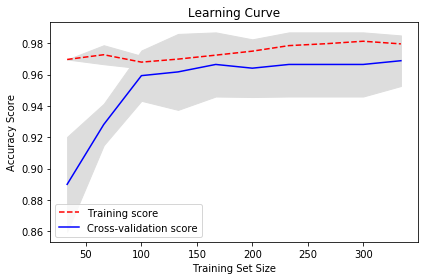

In [138]:
# Cross-validation via grid search
model = LogisticRegression()
paramaters = [ { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000],
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

from sklearn.model_selection import learning_curve 

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=0.1, solver='newton-cg'),
                                                        X_train, y_train,cv=5, scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Best accuracy :  0.9664945496270798
Best parameters : {'C': 0.4058708408012801, 'class_weight': None, 'solver': 'saga'}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.98      1.00      0.99        56

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[93  1]
 [ 0 56]]
99.33333333333333


/home/florian/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


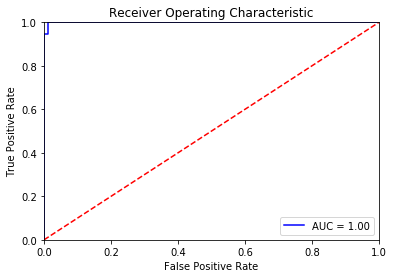

In [139]:
# Cross-validation via random search
from sklearn.model_selection import RandomizedSearchCV
# distributions
from scipy.stats import randint 
from scipy.stats import uniform

model = LogisticRegression()
paramaters = [ { 'C' : uniform(0.01, 20),
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]

n_iter_search = 20


random_search = RandomizedSearchCV(model, param_distributions=paramaters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


# ROC
probs = random_search.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/home/florian/.local/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:400: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Best accuracy :  0.9712918660287081
Best parameters : {'C': 0.014196132969345694, 'class_weight': 'balanced', 'solver': 'sag'}


Testing:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.90      0.96      0.93        56

    accuracy                           0.95       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.95      0.95      0.95       150

[[88  6]
 [ 2 54]]
94.66666666666667


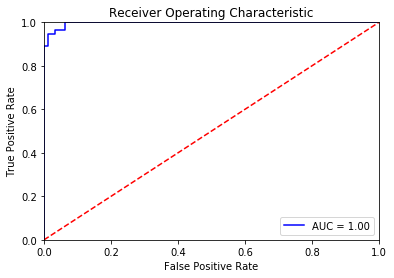

In [140]:
# Cross-validation via Bayes Optimization
# grid search via BayesSearchCV


#Bayessearch cv uit Scikit-optimize
from skopt import BayesSearchCV #scikit-optimize

# distributions
from scipy.stats import randint 
from scipy.stats import uniform

model = LogisticRegression()
paramaters = [ { 'C' : (0.01, 20),
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]

n_iter_search = 20

Bayes_search = BayesSearchCV(model,paramaters,n_iter=n_iter_search,cv=5,verbose=1,n_jobs=-1)


Bayes_search.fit(X_train, y_train)

best_accuracy = Bayes_search.best_score_ 
best_parameters = Bayes_search.best_params_  

print('Best accuracy : ', Bayes_search.best_score_)
print('Best parameters :',Bayes_search.best_params_  )

print('\n')
print('Testing:')
y_pred = Bayes_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


# ROC
probs = Bayes_search.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hertrain de grid-search opnieuw maar selecteer het model met de hoogste balanced accuracy.
Meer info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
Zie ook http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html

Bespreek het resultaat en vergelijk dit met de beste accuracy score die eerder werd behaald.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.6s finished


Best accuracy :  0.9633842876539165
Best parameters : {'C': 0.01, 'class_weight': None, 'solver': 'liblinear'}
balanced_accuracy:  0.9502279635258359
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.90      0.96      0.93        56

    accuracy                           0.95       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.95      0.95      0.95       150

[[88  6]
 [ 2 54]]
94.66666666666667


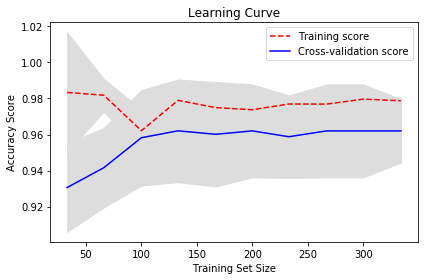

In [141]:
# Cross-validation via grid search - hoogste balanced accuracy
# Cross-validation via grid search
model = LogisticRegression()
paramaters = [ { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000],
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print('balanced_accuracy: ', metrics.balanced_accuracy_score(y_test, y_pred))

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

from sklearn.model_selection import learning_curve 

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=0.1, solver='liblinear'),
                                                        X_train, y_train,cv=5, scoring='balanced_accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="blue", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Resultaat 'balanced_accuracy'
De beste accuracy score ligt lager dan voorheen, dit komt doordat er nu rekening is gehouden met de ongebalanceerdheid. 
Opmerkelijk is ook dat de beste parameters nu veranderd zijn van de **newton-cg** solver naar de **liblinear** solver.

Ga op zoek naar het model dat de hoogste f1-score oplevert op de klasse 'kwaadaardig'.
Daarvoor moet je gebruik maken van de f1 micro score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [142]:
# Cross-validation via grid search - hoogste f1-score voor kwaardaardig
model = LogisticRegression()
paramaters = [ { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000],
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print('f1_score: ', metrics.f1_score(y_test, y_pred, average='micro'))

print('confussion matrix:')
print(confusion_matrix(y_test, y_pred))
print('classification report:')
print(classification_report(y_test, y_pred))


Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:    1.0s


Best accuracy :  0.9736933797909408
Best parameters : {'C': 1, 'class_weight': None, 'solver': 'newton-cg'}
f1_score:  0.9866666666666668
confussion matrix:
[[92  2]
 [ 0 56]]
classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        94
           1       0.97      1.00      0.98        56

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    1.3s finished


Aangezien de dataset in lichte mate ongebalanceerd is hebben de meeste getrainde modellen een 'voorkeur' voor de meerderheidsklasse.
Onderzoek of je de f1-score (of de recall) kan verhogen door het toepassen van onderstaande technieken:
- de parameter class_weight = 'balanced' met de modellen mee te geven.
- Oversampling uit te voeren via SMOTE. Meer info: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html. Vermoedelijk moet je hiervoor nog de imbalanced-learn library installeren via `pip3 install imbalanced-learn`

Bespreek de resultaten die je hebt behaald. Kijk vooral naar de f1_micro score.

In [143]:
# Balancering
# Cross-validation via grid search - hoogste f1-score voor kwaardaardig
model = LogisticRegression()
paramaters = [ { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000],
                   'class_weight': ['balanced'],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]
grid_search_best = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose=5)
grid_search_best = grid_search_best.fit(X_train, y_train)

best_accuracy = grid_search_best.best_score_ 
best_parameters = grid_search_best.best_params_  

print('Best accuracy : ', grid_search_best.best_score_)
print('Best parameters :', grid_search_best.best_params_  )

y_pred = grid_search_best.predict(X_test)
print('f1_score: ', metrics.f1_score(y_test, y_pred, average='micro'))

print('confussion matrix:')
print(confusion_matrix(y_test, y_pred))
print('classification report:')
print(classification_report(y_test, y_pred))


Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.1s


Best accuracy :  0.9736353077816492
Best parameters : {'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}
f1_score:  0.9933333333333333
confussion matrix:
[[93  1]
 [ 0 56]]
classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.98      1.00      0.99        56

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 427 out of 450 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.7s finished


In [134]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE
dataset.groupby('diagnosis').count()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
1,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211


In [144]:
sm = SMOTE(random_state=23)
X, y = sm.fit_resample(features, targets)

# Opsplitsen in training set en test set. Zorg ervoor dat er 150 samples in de test set zitten.
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=150, random_state=123)

In [145]:
model = LogisticRegression()
paramaters = [ { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000],
                   'class_weight': ['balanced', None],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X2_train, y2_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y2_pred = grid_search.predict(X2_test)
print('f1_score: ', metrics.f1_score(y2_test, y2_pred, average='micro'))

print('confussion matrix:')
print(confusion_matrix(y2_test, y2_pred))
print('classification report:')
print(classification_report(y2_test, y2_pred))

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 877 out of 900 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.0s finished


Best accuracy :  0.962562656641604
Best parameters : {'C': 1000, 'class_weight': 'balanced', 'solver': 'newton-cg'}
f1_score:  0.96
confussion matrix:
[[69  3]
 [ 3 75]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.96      0.96      0.96        78

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/home/florian/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


### Bevindingen
De f1-score van het model lag hoger als we ongebalanceerde data gebruikten en `class_weight` gelijk stelde aan **balanced**, dan waneer we met **SMOTE** de data ging balanceren. Op de validation set scoorde beide modellen ongeveer evengoed, **1%** verschil, maar op de test-set een verschil van **3%**.

Veronderstel dat er wordt gevraagd om het aantal false negatives (diagnose is goedaardig terwijl het in werkelijkheid om een kwaadaardige kanker gaat) op de test set tot 0 te brengen.
Welke threshold moet men instellen om ervoor te zorgen dat het model op de test set geen false negatives meer voorspelt en toch nog een zo hoog mogelijke accuraatheid heeft? Stel het aantal false negatives in functie van de threshold grafisch voor. Bespreek de resultaten.

tresholhd: 0.5812577080651756


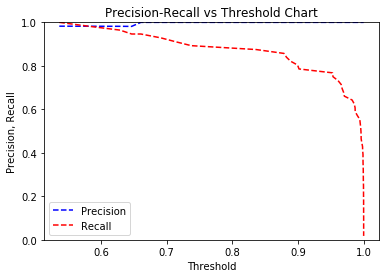

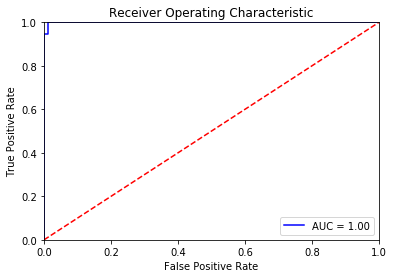

In [112]:
# Reduceren van het aantal false negatives
from sklearn.metrics import precision_recall_curve

probs = grid_search_best.predict_proba(X_test)
preds = probs[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, preds) 
pr_auc = metrics.auc(recall, precision)

for i in range(len(thresholds)):
    if precision[i] == recall[i]:
        print('tresholhd:', thresholds[i])

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Bevindingen
Om de false negatives zo laag mogelijk te houden moet je de threshold instellen op **0.58**

## Opdracht 2 - MNIST

De MNIST ("Modified National Institute of Standards and Technology")is een veelgebruikte dataset voor het testen en benchmarken van klassificatie algoritmes. Het bevat tienduizenden afbeeldingen van handgeschreven getallen. Meer info over deze dataset is te vinden op: http://yann.lecun.com/exdb/mnist/

Bij deze opdracht worden 3 databestanden meegeleverd:

    'train.csv' bevat gelabelde data voor trainen van de classifier.
    'test.csv' bevat gelabelde data voor het testen van de getrainde classifier
    'test_Kaggle.csv' bevat niet-gelabelde data voor het evalueren van de classifier via de competitie te vinden op https://www.kaggle.com/c/digit-recognizer. Deze data is dus enkel bruikbaar bij deelname aan de Kaggle competitie.

1) Train zowel een logistic regression classifier als een Support Vector Machine (met of zonder kernel. Ga via tuning van de hyperparameters op zoek naar de meest performante classifier. Doe dit door de accuracy te maximaliseren of de error rate te minimaliseren op de test.csv dataset. De error rate = 1- accuracy. Het trainen van Support Vector Machines (zeker deze met kernel) vragen enorm veel rekenkracht. Het is daarom verstandig om in eerste instantie te trainen op een klein deel van de training set. Het trainen via logistic regression is minder belastend voor de CPU, desalniettemin wordt aangeraden om de lbfgs solver te gebruiken. (LogisticRegression(multi_class='multinomial', solver='lbfgs'))

2) Verzorg de code telkens van commentaar en schrijf jouw conclusies en besluiten neer.

3) Is het nodig om hier te normaliseren? Welke normalisatie zou je gebruiken? Is de standardscaler een goede keuze?

4) Onderzoek de twee verschillende types van multiclass classification: one-vs-one (ovo) of one-vs-rest (ovr). Kijk vooral naar accuracy en berekeningstijd. Wat zijn de conclusies?

5) Test jouw uiteindelijke classifier met een aantal zelf geschreven getallen. Wat zijn de bevindingen? Waarvan hangt classificatienauwkeurigheid af?

6) Optioneel: test op de 'test_Kaggle' dataset en laad de resultaten in het juiste formaat op naar de Kaggle website. Wat is de behaalde score? Vergelijk deze score met de score op http://yann.lecun.com/exdb/mnist/

Het visualiseren van een digit kan met 'plt.imshow(X_train[n].reshape((28, 28)),cmap = 'gray')'

In [149]:
digits = pd.read_csv('train.csv')

In [151]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

ValueError: cannot reshape array of size 785 into shape (28,28)